<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">
<br>
<br>

In this notebook I follow [Detectron2 Beginner's Tutorial](https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5#scrollTo=HUjkwRsOn1O0) to install Detectron2 and run a pre-trained model.

In [1]:
%gcc --version

UsageError: Line magic function `%gcc` not found.


In [2]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [48 lines of output]
      /home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/setuptools/config/setupcfg.py:293: _DeprecatedConfig: Deprecated config in `setup.cfg`
      !!
      
              ********************************************************************************
              The license_file parameter is deprecated, use license_files instead.
      
              This deprecation is overdue, please update your project and remove deprecated
              calls to avoid build errors in the future.
      
              See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
              ********************************************************************************
      
      !!
       

In [3]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

2.1.1+cu121 False


In [4]:
import os
os.chdir('object_detection/detectron_2')

In [11]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Import some common libraries
import numpy as np
import os, json, cv2, random
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [16]:
ROOT = os.getcwd()
!pwd

/teamspace/studios/this_studio/object_detection/detectron_2


In [12]:
def cv2_imshow(im):
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/matplotlib/m

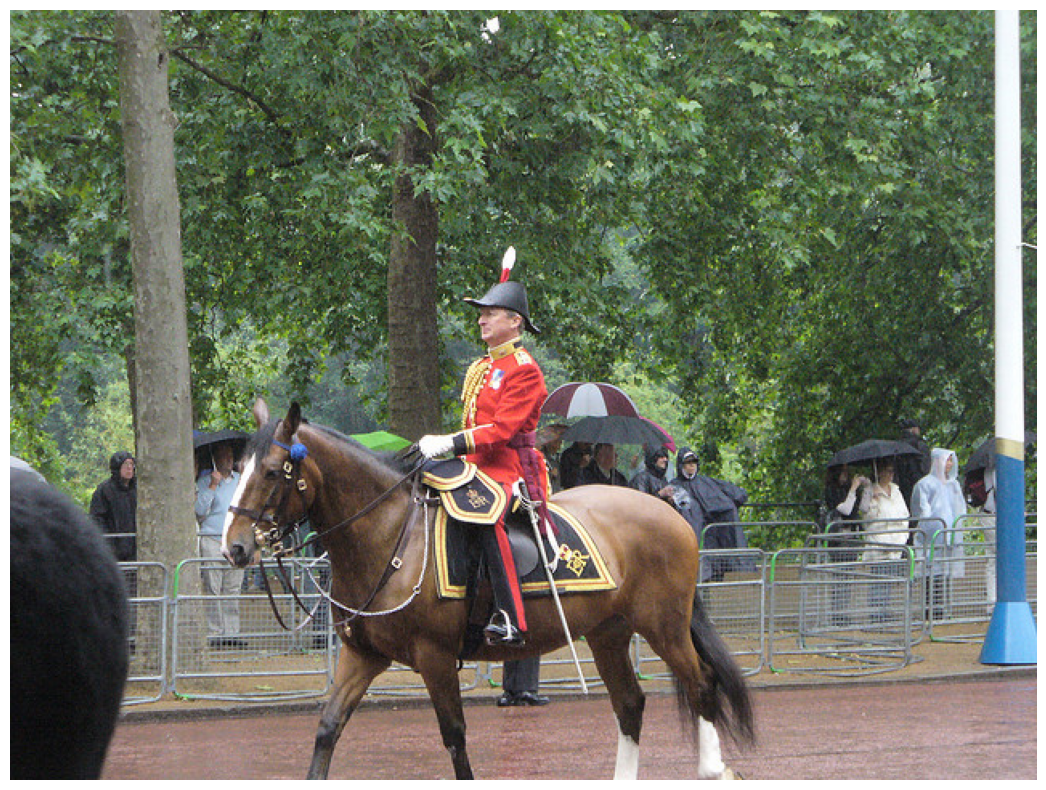

In [17]:
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg

im = cv2.imread("./input.jpg")
cv2_imshow(im)

In [18]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [19]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

NameError: name 'outputs' is not defined

In [20]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

NameError: name 'outputs' is not defined

In [21]:
!pip list

Package                   Version
------------------------- ------------------
absl-py                   2.0.0
aiofiles                  22.1.0
aiohttp                   3.9.1
aiosignal                 1.3.1
aiosqlite                 0.19.0
altair                    5.2.0
annotated-types           0.6.0
antlr4-python3-runtime    4.9.3
anyio                     4.2.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-timeout             4.0.3
attrs                     23.2.0
autocfg                   0.0.8
Babel                     2.14.0
backoff                   2.2.1
beautifulsoup4            4.12.2
black                     23.12.1
bleach                    6.1.0
blinker                   1.7.0
boto3                     1.34.12
botocore                  1.34.12
cachetools                5.3.2
certifi                   2023.11.17
cffi                      1.16.0
charset-normalizer        3.3.2
click 